<a href="https://colab.research.google.com/github/cui0918/78/blob/main/%E7%89%A9%E4%BB%B6%E5%B0%8E%E5%90%91%E6%9C%9F%E6%9C%AB_%E7%AC%AC%E5%85%AD%E7%B5%84_%E8%87%89%E9%83%A8%E8%BE%A8%E8%AD%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
!pip install facenet-pytorch


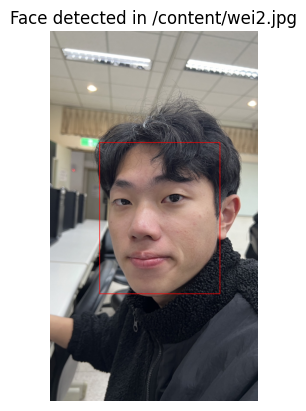

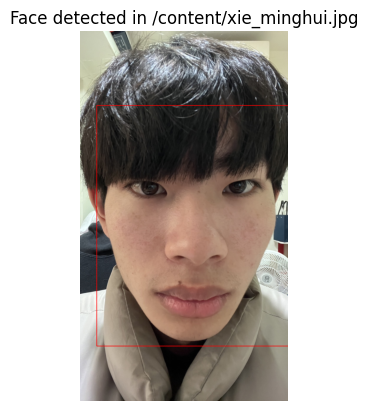

These are different people.


In [22]:
import cv2#(12/27)主要
import numpy as np
from facenet_pytorch import MTCNN, InceptionResnetV1
import matplotlib.pyplot as plt

# 初始化 MTCNN (人臉偵測器) 和 InceptionResnetV1 (人臉嵌入器)
mtcnn = MTCNN(image_size=160)
resnet = InceptionResnetV1(pretrained='vggface2').eval()

# 函數：獲取圖像中的人臉嵌入
def get_face_embedding(img):
    # 使用MTCNN偵測人臉
    boxes, _ = mtcnn.detect(img)
    if boxes is None:
        return None
    # 對齊人臉並獲取其嵌入
    aligned = mtcnn(img)
    embedding = resnet(aligned.unsqueeze(0))
    return embedding

# 函數：檢查兩張圖像中的人是否為同一人
def is_same_person(img_path1, img_path2):
    img1 = cv2.imread(img_path1)
    img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

    img2 = cv2.imread(img_path2)
    img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

    embedding1 = get_face_embedding(img1_rgb)
    embedding2 = get_face_embedding(img2_rgb)

    if embedding1 is None or embedding2 is None:
        return False

    # 計算嵌入之間的歐氏距離，以確定是否為同一人
    distance = np.linalg.norm(embedding1.detach().cpu().numpy() - embedding2.detach().cpu().numpy())

    if distance < 1.0:
        return True
    else:
        return False

# 函數：在圖像中標記人臉的偵測框
def mark_face_detection(img_path):
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # 使用MTCNN偵測人臉
    boxes, _ = mtcnn.detect(img_rgb)

    # 若偵測到人臉，則在其周圍畫一個藍色的矩形框
    if boxes is not None:
        for box in boxes:
            x, y, w, h = map(int, box)
            cv2.rectangle(img_rgb, (x, y), (w, h), (255, 0, 0), 2)

    # 顯示帶有人臉偵測框的圖像
    plt.imshow(img_rgb)
    plt.title(f"Face detected in {img_path}")
    plt.axis('off')
    plt.show()
# 主程序開始
image_paths = ["/content/wei2.jpg", "/content/xie_minghui.jpg"]

# 針對每張圖像，偵測人臉並顯示結果
for path in image_paths:
    mark_face_detection(path)

# 檢查這兩張圖像中的人是否為同一人
if is_same_person(*image_paths):
    print("These are the same person.")
else:
    print("These are different people.")


In [ ]:
!pip install opencv-python
!pip install numpy
!pip install pillow

import cv2
import numpy as np
from PIL import Image, ImageDraw, ImageFont
import time


In [ ]:
# 加载脸部和眼睛分类器  失敗
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# 加载謝明輝的脸部照片（这里简化为一个示例图片）
img = cv2.imread('wei.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 检测脸部
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

for (x,y,w,h) in faces:
    cv2.rectangle(img, (x,y), (x+w,y+h), (255,0,0), 2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]

    # 检测眼睛
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color, (ex,ey), (ex+ew,ey+eh), (0,255,0), 2)

cv2_imshow('Face Detection', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

NameError: ignored

In [ ]:
def display_time_and_username():  #(失敗)
    current_time = time.strftime('%Y-%m-%d %H:%M:%S', time.localtime())

    # 创建一个带有文字的图像
    img = Image.new('RGB', (300, 100), color = (73, 109, 137))
    d = ImageDraw.Draw(img)
    d.text((10,10), f'用户名: 謝明輝\n时间: {current_time}', fill=(255,255,0))

    img.show()

# 调用函数显示当前时间和用户名
display_time_and_username()


UnicodeEncodeError: ignored

In [ ]:
# 安装需要的库  (目前失敗)
!pip install opencv-python
!pip install dlib
!pip install tk

# 导入所需的库
import cv2
import dlib
import tkinter as tk
from datetime import datetime

# 人眼检测函数
def detect_eyes(frame):
    detector = dlib.get_frontal_face_detector()
    predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")  # 需要下载该文件

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = detector(gray)

    for face in faces:
        landmarks = predictor(gray, face)
        left_eye = landmarks.parts()[36:42]
        right_eye = landmarks.parts()[42:48]

        left_eye_pts = cv2.convexHull(left_eye)
        right_eye_pts = cv2.convexHull(right_eye)

        cv2.drawContours(frame, [left_eye_pts], -1, (0, 255, 0), 1)
        cv2.drawContours(frame, [right_eye_pts], -1, (0, 255, 0), 1)

# 创建小窗口弹出显示时间和用户名
def create_popup_window(username):
    popup = tk.Tk()
    popup.wm_title("User Information")

    label = tk.Label(popup, text=f"User: {username}\nTime: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
    label.pack(pady=10)

    popup.mainloop()

# 打开摄像头
cap = cv2.VideoCapture(0)

# 主循环
while True:
    ret, frame = cap.read()

    if ret:
        detect_eyes(frame)  # 调用人眼检测函数
        cv2.imshow('Eye Detection', frame)

        # 弹出小窗口
        create_popup_window("謝明輝")

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# 释放资源
cap.release()
cv2.destroyAllWindows()


KeyboardInterrupt: ignored

In [ ]:
from google.colab import files
uploaded = files.upload()

# 获取上传图片的文件名
image_path = list(uploaded.keys())[0]


Saving xie_minghui.jpg to xie_minghui.jpg


In [ ]:
# 安装和导入所需的库
!pip install opencv-python
!pip install dlib

In [ ]:
from google.colab import files #(可以執行成功，顯示時間 人物照片) (二更 失敗)
import cv2
import dlib
from datetime import datetime
from google.colab.patches import cv2_imshow  # 用于在Colab中显示图像

# 上传图片到Colab环境
uploaded = files.upload()

# 获取上传图片的文件名
image_path = list(uploaded.keys())[0]

# 人眼检测函数
def detect_eyes(frame):
    detector = dlib.get_frontal_face_detector()
    predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")  # 需要下载该文件

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = detector(gray)

    for face in faces:
        landmarks = predictor(gray, face)
        left_eye = landmarks.parts()[36:42]
        right_eye = landmarks.parts()[42:48]

        left_eye_pts = cv2.convexHull(left_eye)
        right_eye_pts = cv2.convexHull(right_eye)

        cv2.drawContours(frame, [left_eye_pts], -1, (0, 255, 0), 1)
        cv2.drawContours(frame, [right_eye_pts], -1, (0, 255, 0), 1)

# 读取上传的照片
img = cv2.imread(image_path)

# 进行眼睛检测
detect_eyes(img)

# 在Colab输出区域显示信息
username = "謝明輝"
current_time = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
print(f"User: {username}\nTime: {current_time}")

# 显示图像
cv2_imshow(img)


Saving wei.jpg to wei (1).jpg


error: ignored

In [ ]:
from google.colab import drive  #(沒辦法成功上傳)失敗
import cv2
import dlib
import numpy as np

# 導入 google.colab 的 drive 模組，在虛擬機中掛載 Google Drive 為路徑 '/gdrive'。
from google.colab import drive
drive.mount('/gdrive')

# 將當前目錄更改為雲端硬碟的根目錄
%cd /gdrive/My Drive/

# Mount Google Drive
drive.mount('/content/drive')

# 使用Dlib的预训练模型
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

# 加载上传的训练图片
uploaded = files.upload()
train_image_path = list(uploaded.keys())[0]
train_img = cv2.imread(train_image_path)

# 眼睛特征提取
gray_train = cv2.cvtColor(train_img, cv2.COLOR_BGR2GRAY)
faces_train = detector(gray_train)

if len(faces_train) > 0:
    landmarks_train = predictor(gray_train, faces_train[0])
    left_eye_train = landmarks_train.parts()[36:42]
    right_eye_train = landmarks_train.parts()[42:48]

    left_eye_pts_train = np.array(left_eye_train)
    right_eye_pts_train = np.array(right_eye_train)


    # 保存眼睛特征到Google Drive
    np.savez("/content/drive/My Drive/eye_features.npz", left_eye=left_eye_pts_train, right_eye=right_eye_pts_train)

import os
file_path = "/content/drive/My Drive/eye_features.npz"
print(os.path.exists(file_path))


KeyboardInterrupt: ignored

In [ ]:
from google.colab import files (失敗)

# 上传 shape_predictor_68_face_landmarks.dat 文件到 Colab
uploaded = files.upload()


KeyboardInterrupt: ignored

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 8.7 MB/s eta 0:00:00


Saving wei.jpg to wei (2).jpg
1/1 [==============================] - 0s 160ms/step


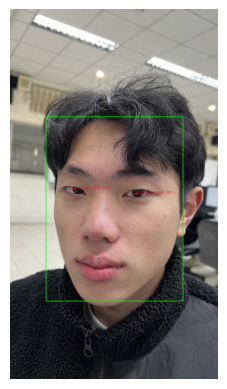

In [ ]:
# 安装 MTCNN 库 (如果你还没有安装)   (初步照片中人物辨識)
!pip install mtcnn

# 导入所需的库
import cv2
from matplotlib import pyplot as plt
from mtcnn.mtcnn import MTCNN
from google.colab import files  # 请注意，如果您不在 Google Colab 中运行此代码，请删除此导入语句

# 上传图像
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# 读取图像
img = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 创建 MTCNN 检测器
detector = MTCNN()

# 进行人脸和关键点检测
results = detector.detect_faces(img_rgb)

# 绘制检测结果
for result in results:
    # 人脸框
    x, y, width, height = result['box']
    cv2.rectangle(img_rgb, (x, y), (x + width, y + height), (0, 255, 0), 2)

    # 关键点
    keypoints = result['keypoints']

    # 标记左眼
    left_eye_x, left_eye_y = keypoints['left_eye']
    cv2.circle(img_rgb, (left_eye_x, left_eye_y), 5, (255, 0, 0), -1)  # 蓝色圆圈标记左眼
    cv2.putText(img_rgb, f"Left Eye: ({left_eye_x}, {left_eye_y})", (left_eye_x, left_eye_y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)

    # 标记右眼
    right_eye_x, right_eye_y = keypoints['right_eye']
    cv2.circle(img_rgb, (right_eye_x, right_eye_y), 5, (255, 0, 0), -1)  # 蓝色圆圈标记右眼
    cv2.putText(img_rgb, f"Right Eye: ({right_eye_x}, {right_eye_y})", (right_eye_x, right_eye_y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)

# 显示结果
plt.imshow(img_rgb)
plt.axis('off')
plt.show()


In [ ]:
from mtcnn.mtcnn import MTCNN   #(失敗)
import cv2
import numpy as np

# 创建 MTCNN 检测器
detector = MTCNN()

# 加载代表性的图像并提取特征
img_xie = cv2.imread("/content/hui.jpg")  # 替换为实际路径
result = detector.detect_faces(cv2.cvtColor(img_xie, cv2.COLOR_BGR2RGB))
xie_features = result[0]['keypoints']  # 这只是一个简化的示例，您可能需要使用更复杂的方法提取特征

# 当上传新图像时
threshold = 10  # 根据实际情况调整阈值
def is_same_person(image_path):
    img = cv2.imread(image_path)

    # 检查图像是否成功读取
    if img is None:
        print("无法读取图像。")
        return False

    result = detector.detect_faces(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    if result:
        new_features = np.array(list(result[0]['keypoints'].values()))  # 提取新图像的关键点坐标
        xie_features_array = np.array(list(xie_features.values()))  # 提取图像的关键点坐标

        # 使用某种方法比较 new_features 和 xie_features
        similarity_score = np.linalg.norm(new_features - xie_features_array)  # 这只是一个简单的欧氏距离比较

        if similarity_score < threshold:  # 设置一个合适的阈值来判断是否是同一个人
            return True
    return False

# 示例使用
if is_same_person("/content/hui2.jpg"):  # 替换为实际路径
    print("This is wei.")
else:
    print("This is not wei.")


1/1 [==============================] - 0s 33ms/step
This is not wei.


In [ ]:
!pip install facenet-pytorch


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 8.7 MB/s eta 0:00:00


1/1 [==============================] - 0s 372ms/step


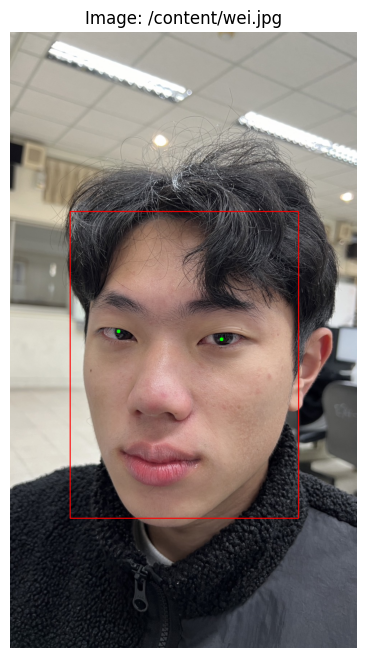

error: ignored

In [ ]:
from mtcnn import MTCNN #主要(可以顯示成功，但結果失敗)
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_and_mark_eyes(image_path):
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    detector = MTCNN()
    faces = detector.detect_faces(img_rgb)

    if faces:
        for face in faces:
            x, y, w, h = face['box']
            left_eye = face['keypoints']['left_eye']
            right_eye = face['keypoints']['right_eye']

            cv2.circle(img_rgb, left_eye, 5, (0, 255, 0), -1)
            cv2.circle(img_rgb, right_eye, 5, (0, 255, 0), -1)

            cv2.rectangle(img_rgb, (x, y), (x+w, y+h), (255, 0, 0), 2)

    plt.figure(figsize=(8, 8))
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.title(f"Image: {image_path}")
    plt.show()

def is_same_person(image_path1, image_path2):
    img1 = cv2.imread(image_path1)
    img2 = cv2.imread(image_path2)

    detector = MTCNN()

    faces1 = detector.detect_faces(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
    faces2 = detector.detect_faces(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

    if not faces1 or not faces2:
        return False

    features1 = np.array(list(faces1[0]['keypoints'].values()))
    features2 = np.array(list(faces2[0]['keypoints'].values()))

    # 使用歐幾里得距離進行特徵比較
    distance = np.linalg.norm(features1 - features2)

    # 調整閾值為15 (根據實際情況可以進一步調整)
    if distance < 15:
        return True
    else:
        return False

# 主程序
image_paths = ["/content/wei.jpg", "/content/wei2.jpg"]
for path in image_paths:
    detect_and_mark_eyes(path)

if is_same_person("/content/wei.jpg", "/content/wei2.jpg"):
    print("These are the same person.")
else:
    print("These are different people.")


In [ ]:
# 导入所需的库  # 失敗 (上傳到雲端後看不到)
from google.colab import drive, files
import cv2
import dlib
import numpy as np

# 挂载Google Drive
drive.mount('/content/drive')

# 加载Dlib的预训练模型
detector = dlib.get_frontal_face_detector()
predictor_path = "/content/shape_predictor_68_face_landmarks.dat"  # 请确保这个路径是正确的
predictor = dlib.shape_predictor(predictor_path)

# 上传图像
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# 读取上传的图像
img = cv2.imread(image_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 使用Dlib的检测器检测人脸
faces = detector(gray)

if len(faces) > 0:
    for face in faces:
        # 使用预测器获取眼睛的特征点
        landmarks = predictor(gray, face)

        # 提取左眼和右眼的特征点
        left_eye_points = np.array([[landmarks.part(i).x, landmarks.part(i).y] for i in range(36, 42)])
        right_eye_points = np.array([[landmarks.part(i).x, landmarks.part(i).y] for i in range(42, 48)])

        # 在图像上绘制特征点（可选，根据需要）
        for (x, y) in left_eye_points:
            cv2.circle(img, (x, y), 2, (0, 255, 0), -1)
        for (x, y) in right_eye_points:
            cv2.circle(img, (x, y), 2, (0, 255, 0), -1)

    # 显示处理后的图像
    cv2.imshow("Detected Eyes", img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

else:
    print("未检测到人脸。")


MessageError: ignored